# Pytesseract | Page Segmentation Modes (PSMs)

This example covers page segmentation modes or PSMs in Tesseract/pytesseract. 

Page segmentation mode in Tesseract refers to the process of dividing an image containing text into individual text segments or regions. By specifying the desired page segmentation mode, you can instruct Tesseract on how to analyze the image and extract the text accurately. Experimentation with different modes may be necessary to achieve the best results for your specific use case.

```sh
tesseract --help-psm
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.
```

In [26]:
from IPython.display import HTML
from PIL import Image, ImageDraw, ImageFont
import pytesseract

def draw_data(im, psm='--psm 3'):
    print("Text Output: \n\n------------\n", pytesseract.image_to_string(im, config=psm))
    draw = ImageDraw.Draw(im)
    data = pytesseract.image_to_data(im, config=psm).split('\n')
    font = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeMono.ttf", 24)
    for d in data[1:]:
        cols = d.split('\t')
        if len(cols) > 1:
            left, top, width, height = int(cols[6]), int(cols[7]), int(cols[8]),int(cols[9])
            text = cols[11]
            draw.rectangle(((left, top), (left+width, top+height)), outline=(0, 255, 0))
            draw.text((left, top-15), text, font=font, fill=(255, 0, 0)) 
    display(im.resize(int(0.5*s) for s in im.size))

## Experimenting with PSMs

Here we will be using a invoice-style document. We will look at a few examples that work well for this document, then a few that don't.

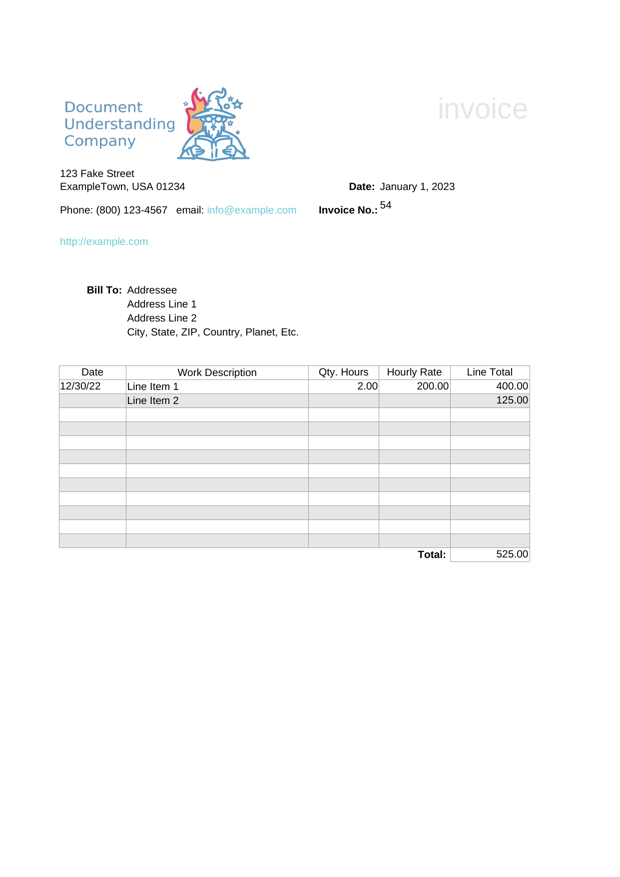

In [18]:
path = '../../../../binder-datasets/ocr/images/invoice.png'
im = Image.open(path)
w,h = im.size
display(im.resize(int(0.5*s) for s in im.size))

## Good segmentation models for this document

## PSM 3 - Fully automatic page segmentation, but no OSD. (Default)
PSM 3 is the automatic page segmentation mode that analyzes the input image and attempts to intelligently detect and segment text regions based on the layout and structure of the document.

It performs automatic orientation detection to correctly orient the text and script detection to identify the writing system used in the document.

PSM 3 is suitable for general-purpose OCR tasks when dealing with typical documents with standard text flow, such as letters, articles, or book pages.

We can see in this case that all of the words are segmented, and surprisingly even the table and image has been segmented as well with both horizontal shaped boxes and vertical shaped boxes.

Text Output: 

------------
  

Document
Understanding
Company

 

123 Fake Street
ExampleTown, USA 01234

Phone: (800) 123-4567 email: info@example.com

http://example.com

Bill To: Addressee

Address Line 1
Address Line 2
City, State, ZIP, Country, Planet, Etc.

Date: January 1, 2023

Invoice No.: >4

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

Date Work Description Qty. Hours | Hourly Rate Line Total
12/30/22 Line Item 1 2.00 200.00 400.00
Line Item 2 125.00:
Total: 525.00

 

 




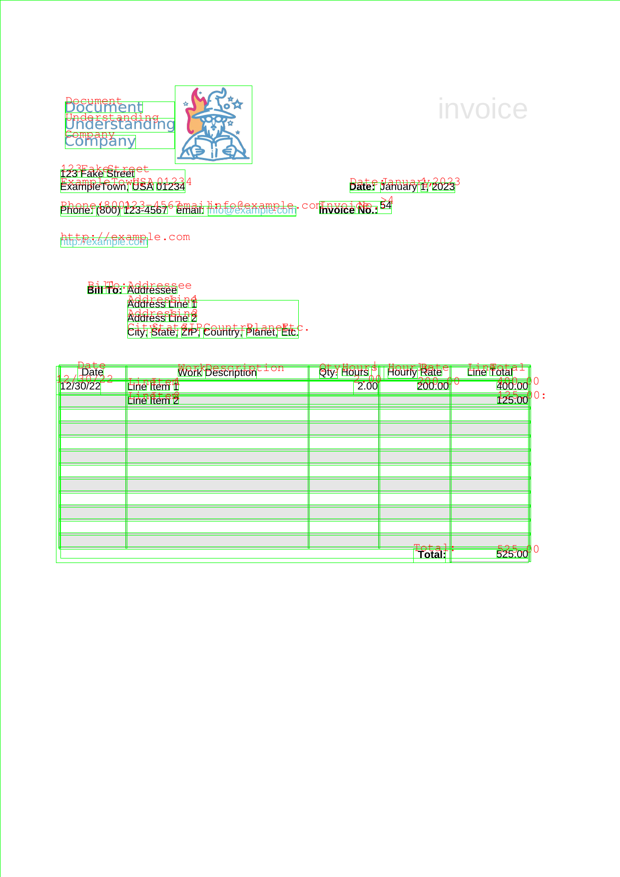

In [27]:
draw_data(im.copy(), '--psm 3')

## PSM 12 - Sparse text with OSD

PSM 12 is designed for documents with sparse text and irregular layouts, where the text is scattered across the document and not necessarily organized into structured paragraphs or columns.

It performs automatic orientation detection and is optimized for handling cases where the text is sparsely distributed, such as business cards, receipts, or images with isolated text elements.

PSM 12 is suitable for scenarios where the text regions are not densely packed or do not conform to a specific layout structure.

We can see in this case that words stricly are segmented, unlike in PSM 3 where we also saw that some of the table was being identified.

Document

ovr

S

Understanding

eS

Company

KS

SN

123 Fake Street

ExampleTown, USA 01234

Date: January 1, 2023

4

Phone: (800) 123-4567 email: info@example.com

Invoice No.: >

http://example.com

Bill To: Addressee

Address Line 1

Address Line 2

City, State, ZIP, Country, Planet, Etc.

Date

Work Description

Qty. Hours

Hourly Rate

Line Total

12/30/22

Line Item 1

2.00

200.00

400.00

Line Item 2

125.00:

Total

525.00




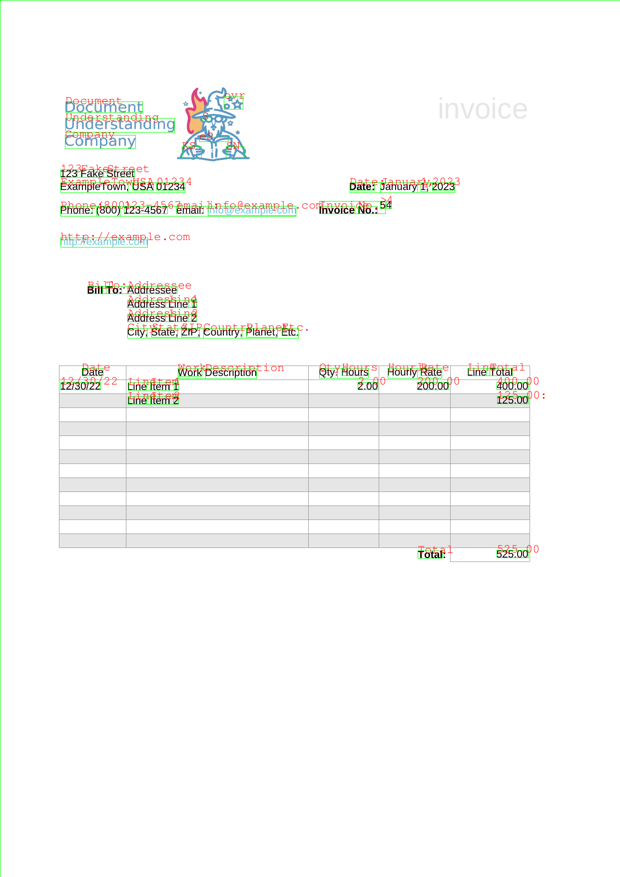

In [14]:
draw_data(im.copy(), '--psm 12')

## PSM 4 - Assume a single column of text of variable sizes.

PSM 4 assumes that the input document contains a single column of text and is suitable for situations where you have a document with a simple, continuous flow of text in a single column.

It ignores multi-column layouts and focuses on processing the text as a single continuous block.

PSM 4 is commonly used for processing documents like pages from novels, letters, or single-column newspaper articles.

We can see in the output we mostly get horizontal bounding boxes, which no vertical shaped bounding boxes like in PSM 3.

Document
Understanding
Company

 

123 Fake Street
ExampleTown, USA 01234 Date: January 1, 2023

Phone: (800) 123-4567 email: info@example.com Invoice No.: °4

http://example.com

Bill To: Addressee
Address Line 1
Address Line 2
City, State, ZIP, Country, Planet, Etc.

 

 

 

Date Work Description Qty. Hours | Hourly Rate Line Total
12/30/22 Line Item 1 2.00 200.00 400.00
Line Item 2 125.00:

 

 

 

 

 

 

 

 

 

 

 

Total: 525.00




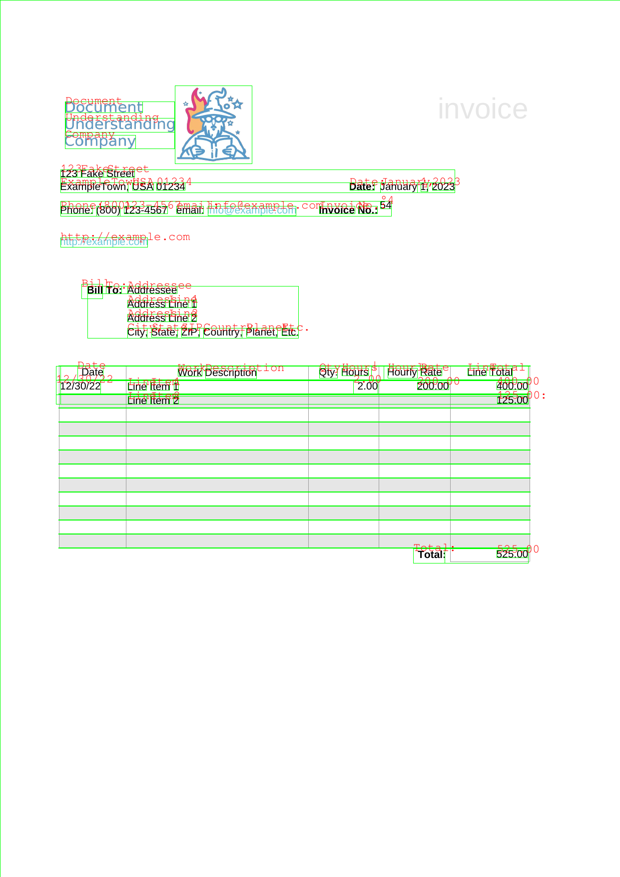

In [15]:
draw_data(im.copy(), '--psm 4')

## Bad segmentations models for this document

## PSM 7 - Treat the image as a single text line

PSM 7 assumes that the image contains a single line of text and focuses on recognizing the text within that line. 

It ignores any multi-line structures, columns, or other layout elements in the document.

PSM 7 is best suited for cases where the text is presented as a single, horizontally aligned line.

We can see in the output the document is treated as several bounding boxes across the horizontal axis.

—_ ; a | |




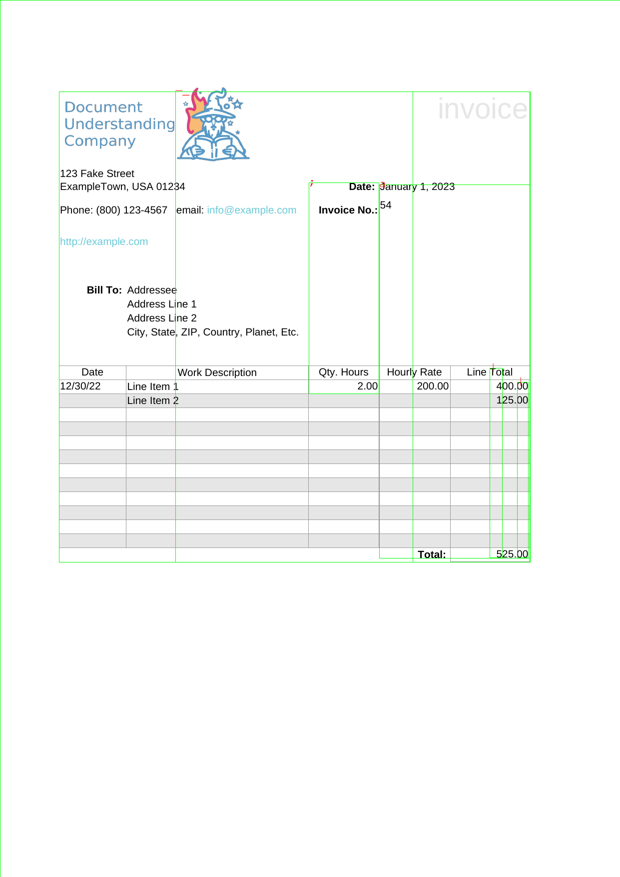

In [21]:
draw_data(im.copy(), '--psm 7')

## PSM 8 - Treat the image as a single word

PSM 8 assumes that the image represents a single word or a small cluster of words with no significant gaps or spacing between them. It focuses on recognizing the text within that word or word group.

This mode is particularly useful when you want to extract or recognize individual words from an image, such as extracting text from a word-based logo, signs, or labels.

We can see in the output that the entire document is treated as one bounding box.

Text Output: 
 Fe




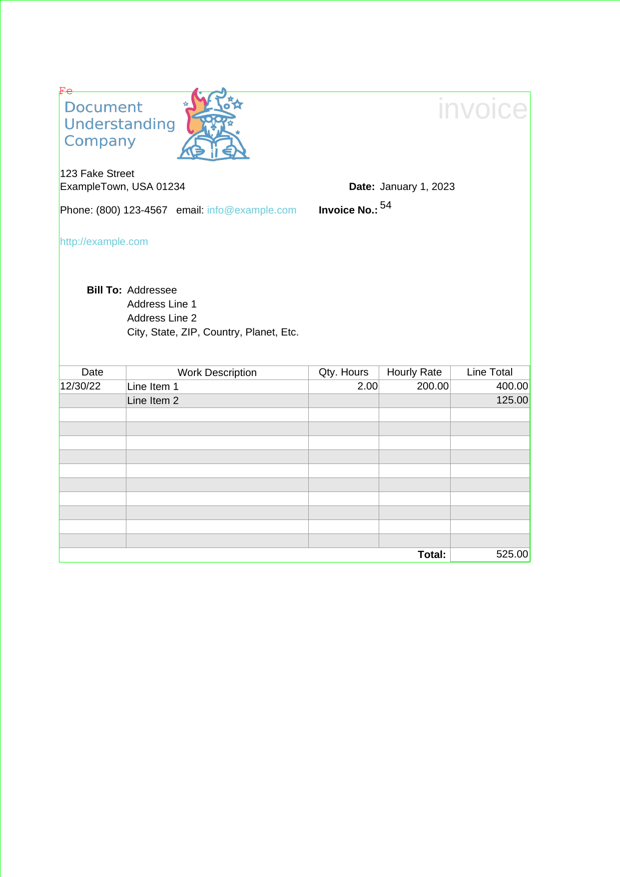

In [25]:
draw_data(im.copy(), '--psm 8')